## Mander's coefficient of fraction of condensates overlapping into Lysosome

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [18]:
# Data for Manders' coefficient
manders_values = [0.008, 0.009, 0.011, 0.065, 0.088]

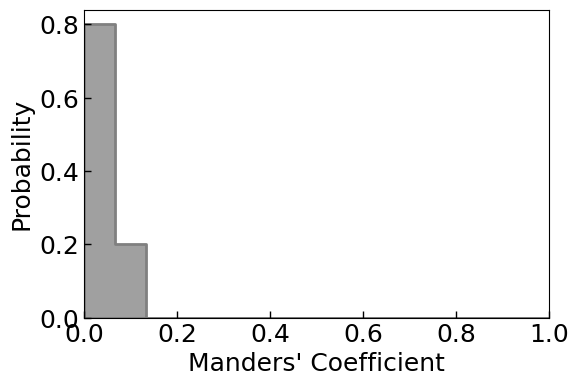

Mean: 0.036199999999999996
Standard Error of Mean (SEM): 0.01685645277037847


In [19]:
# Set up the plot
plt.figure(figsize=(6, 4))
df = pd.DataFrame({"value": manders_values}, dtype=float)
sns.histplot(
    data=df,
    x="value",
    bins=15,
    binrange=(0, 1),  # Adjusted range for Manders' coefficient
    stat="probability",
    lw=2,
    element="step",
    color="gray",
)
# plt.axvline(0, c="k", lw=2, ls="--")
plt.xlim(0, 1)
plt.xlabel("Manders' Coefficient", fontsize=18)
plt.ylabel("Probability", fontsize=18)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.savefig("manders_coefficient_distribution_lysosome.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

# Calculate mean and standard error
mean_value = np.mean(manders_values)
sem_value = np.std(manders_values, ddof=1) / np.sqrt(len(manders_values))
print("Mean:", mean_value)
print("Standard Error of Mean (SEM):", sem_value)

## Mander's coefficient of fraction of condensates overlapping into ER

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [21]:
# Data for Manders' coefficient
manders_values = [0.541 , 0.732 , 0.554 , 0.71 , 0.531 , 0.578 , 0.625 , 0.584 , 0.493 , 0.603 , 0.586 ]

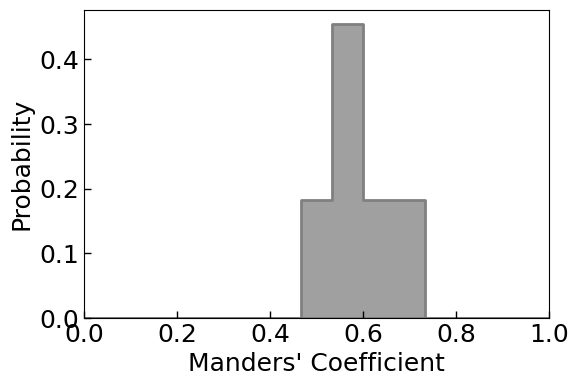

Mean: 0.5942727272727274
Standard Error of Mean (SEM): 0.021854931171910046


In [22]:
# Set up the plot
plt.figure(figsize=(6, 4))
df = pd.DataFrame({"value": manders_values}, dtype=float)
sns.histplot(
    data=df,
    x="value",
    bins=15,
    binrange=(0, 1),  # Adjusted range for Manders' coefficient
    stat="probability",
    lw=2,
    element="step",
    color="gray",
)
# plt.axvline(0, c="k", lw=2, ls="--")
plt.xlim(0, 1)
plt.xlabel("Manders' Coefficient", fontsize=18)
plt.ylabel("Probability", fontsize=18)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.savefig("manders_coefficient_distribution_ER.png", format="png", dpi=300, bbox_inches="tight")
plt.show()

# Calculate mean and standard error
mean_value = np.mean(manders_values)
sem_value = np.std(manders_values, ddof=1) / np.sqrt(len(manders_values))
print("Mean:", mean_value)
print("Standard Error of Mean (SEM):", sem_value)

## Mander's coefficient plot for HOPS-ER vs HOPS-GEM

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

HOPS-GEM v.s. HOPS-ER: Welch's t-test independent samples with Bonferroni correction, P_val=1.023e-08 stat=-1.042e+01


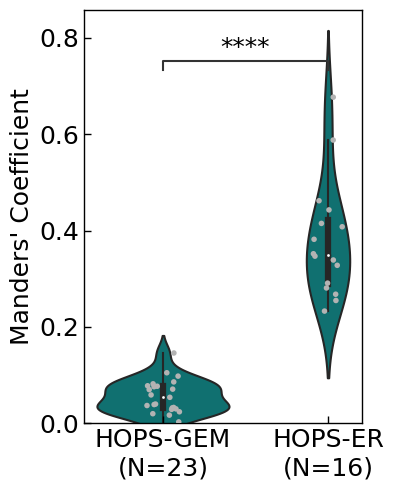

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation

# Data
hops_gem = [0.076, 0.077, 0.039, 0.086, 0.059, 0.02, 0.033, 0.03, 0.003, 0.032, 0.04, 0.078, 0.071, 0.024, 0.082, 0.037, 
            0.054, 0.105, 0.098, 0.029, 0.017, 0.07, 0.146]
hops_er = [0.255, 0.339, 0.677, 0.281, 0.588, 0.268, 0.291, 0.328, 0.462, 0.382, 0.443, 0.408, 0.233, 0.347, 0.415, 0.352]

# Combine data into a DataFrame for Seaborn
import pandas as pd
data = pd.DataFrame({
    'HOPS-GEM': hops_gem,
    'HOPS-ER': hops_er + [np.nan] * (len(hops_gem) - len(hops_er))  # pad with NaNs if not matching length
})

# Melt DataFrame to long format
data_melted = data.melt(var_name='Condition', value_name='Value')

# Plotting
plt.figure(figsize=(4, 5))

# Violin plot
ax = sns.violinplot(data=data_melted, x='Condition', y='Value', palette=['#008080', '#008080']) 

# Strip plot for individual data points
sns.stripplot(data=data_melted, x='Condition', y='Value', color='0.7', size=4, jitter=True)

# Add statistical annotations
box_pairs = [('HOPS-ER', 'HOPS-GEM')]
add_stat_annotation(ax, data=data_melted, x='Condition', y='Value', box_pairs=box_pairs, 
                    test='t-test_welch', text_format='star', loc='inside', verbose=2, fontsize=18)

# Customize axis labels and layout
plt.ylabel("Manders' Coefficient", fontsize=18)
plt.xlabel("")
plt.ylim(0, None)

# Customize x-tick labels with row counts
labels_with_counts = [f"{label}\n(N={data[label].notna().sum()})" for label in data.columns]
ax.set_xticklabels(labels_with_counts, ha='center', fontsize=18)

# Customize spines
for spine in plt.gca().spines.values():
    spine.set_linewidth(1)

plt.gca().tick_params(
    axis='both',
    which='major',
    labelsize=18,
    direction='in',
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)

# Save and show the plot
plt.tight_layout()
plt.savefig("violin_plot_HOPS.png", format="png", bbox_inches="tight", dpi=300)
plt.show()